# OSM Data Quality

## Outline of the clustering analysis

- build working environment
- recover data
- filter data (select interesting features, delete outliers, normalize data)
    - select interesting features
    - delete outliers, if needed
    - normalize data
- PCA
    - evaluate variance and select dimension quantity
    - implement the analyze
    - study the feature contributions
    - draw individuals results (*e.g.* through correlation circles)
- clustering
    - investigate on the cluster number
    - implement the analysis with the final cluster quantity
    - draw results

## Change set metadata analysis

### Introduction: build working environment

In [1]:
import os.path as osp

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('talk')

### Data recovering

In [4]:
datarep = './data/output-extracts/bordeaux-metropole'

In [11]:
chgset_md = pd.read_csv(osp.join(datarep, 'bordeaux-metropole-chgset-md.csv'), index_col=0)

In [6]:
chgset_md.describe().T

,count,mean,std,min,25%,50%,75%,max
chgset,34276.0,2.137804e+07,1.346082e+07,3649.000000,1.046602e+07,1.966280e+07,3.317506e+07,4.622396e+07
duration_m,34276.0,3.140047e+00,1.845034e+01,0.000000,0.000000e+00,1.666667e-02,6.666667e-02,6.903167e+02
uid,34276.0,8.517589e+05,1.106768e+06,165.000000,5.392100e+04,3.025910e+05,1.309032e+06,5.331702e+06
user_lastchgset_h,34276.0,3.723965e+02,2.438819e+03,-9452.494444,3.361111e-02,1.872222e-01,1.619417e+01,7.368212e+04
n_elem_modif,34276.0,1.009207e+02,1.336577e+03,1.000000,1.000000e+00,4.000000e+00,2.000000e+01,5.000000e+04
n_node_modif,34276.0,8.194483e+01,1.169405e+03,0.000000,0.000000e+00,2.000000e+00,1.400000e+01,5.000000e+04
n_way_modif,34276.0,1.827672e+01,2.829815e+02,0.000000,0.000000e+00,1.000000e+00,4.000000e+00,2.000100e+04
n_relation_modif,34276.0,6.991189e-01,1.000324e+01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.363000e+03
n_elem_modif_cr,34276.0,8.055196e+01,1.313698e+03,0.000000,0.000000e+00,1.000000e+00,7.000000e+00,5.000000e+04
n_node_modif_cr,34276.0,6.862971e+01,1.157733e+03,0.000000,0.000000e+00,0.000000e+00,6.000000e+00,5.000000e+04


### Data filtering

#### Feature selection

In [7]:
def extract_features(data, pattern):
    """ extract features from data that respect the string pattern given as a parameter
    """
    return data.loc[:,[pattern in col for col in data.columns]]
def drop_features(data, pattern):
    """ drop features from data that respect the string pattern given as a parameter
    """
    return data.loc[:,[pattern not in col for col in data.columns]]

In [12]:
chgset_elem = extract_features(chgset_md, 'elem')
chgset_elem.quantile(np.linspace(0.9,1,11)).T

,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
n_elem_modif,71.0,81.0,92.0,106.0,121.5,144.0,176.0,230.75,350.0,798.25,50000.0
n_elem_modif_cr,36.0,41.0,47.0,54.0,63.0,76.0,95.0,124.00,176.0,403.75,50000.0
n_elem_modif_del,4.0,5.0,6.0,8.0,10.0,12.0,15.0,21.00,32.0,69.00,14773.0
n_elem_modif_imp,22.0,25.0,28.0,32.0,38.0,45.0,55.0,72.00,100.5,177.25,18880.0
nmin_modif_byelem,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,2.00,30.0
nmed_modif_byelem,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.5,2.00,30.0
nmax_modif_byelem,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.00,3.0,6.00,1355.0
n_elem,69.0,78.0,89.0,103.0,117.0,138.0,168.0,216.00,316.0,655.25,50000.0
n_elem_cr,32.0,36.0,42.0,48.0,56.0,68.0,83.0,109.00,151.0,316.50,49715.0
n_elem_imp,20.0,22.0,25.0,28.0,32.0,38.0,46.0,59.00,82.0,139.00,18664.0


In [13]:
# Set the change set ID and the user ID as data frame indices
chgset_md = chgset_md.set_index(['chgset','uid'])
chgset_md.shape

(34276, 39)

In [14]:
# Drop dates (change set opening and closing)
chgset_md = drop_features(chgset_md, '_at')
chgset_md.shape

(34276, 37)

In [15]:
# Focus only on element-related features
chgset_md = drop_features(chgset_md, 'relation')
chgset_md = drop_features(chgset_md, 'way')
chgset_md = drop_features(chgset_md, 'node')
chgset_md.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_m,34276.0,3.140047,18.450339,0.000000,0.000000,0.016667,0.066667,690.316667
user_lastchgset_h,34276.0,372.396510,2438.818627,-9452.494444,0.033611,0.187222,16.194167,73682.122778
n_elem_modif,34276.0,100.920673,1336.576861,1.000000,1.000000,4.000000,20.000000,50000.000000
n_elem_modif_cr,34276.0,80.551961,1313.697596,0.000000,0.000000,1.000000,7.000000,50000.000000
n_elem_modif_del,34276.0,6.263420,137.048246,0.000000,0.000000,0.000000,0.000000,14773.000000
n_elem_modif_imp,34276.0,14.105292,158.582607,0.000000,1.000000,2.000000,6.000000,18880.000000
nmin_modif_byelem,34276.0,1.033084,0.434893,1.000000,1.000000,1.000000,1.000000,30.000000
nmed_modif_byelem,34276.0,1.042216,0.475234,1.000000,1.000000,1.000000,1.000000,30.000000
nmax_modif_byelem,34276.0,1.215428,7.398471,1.000000,1.000000,1.000000,1.000000,1355.000000
n_elem,34276.0,98.488768,1334.885445,1.000000,1.000000,4.000000,20.000000,50000.000000


In [16]:
chgset_md.quantile(np.linspace(0,1,11)).T

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
duration_m,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.016667,0.033333,0.100000,1.216667,690.316667
user_lastchgset_h,-9452.494444,0.008889,0.023889,0.046667,0.091944,0.187222,0.539722,4.309028,28.187222,262.555417,73682.122778
n_elem_modif,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,7.000000,14.000000,29.000000,71.000000,50000.000000
n_elem_modif_cr,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,12.000000,36.000000,50000.000000
n_elem_modif_del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,14773.000000
n_elem_modif_imp,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,9.000000,22.000000,18880.000000
nmin_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
nmed_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
nmax_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1355.000000
n_elem,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,7.000000,14.000000,29.000000,69.000000,50000.000000


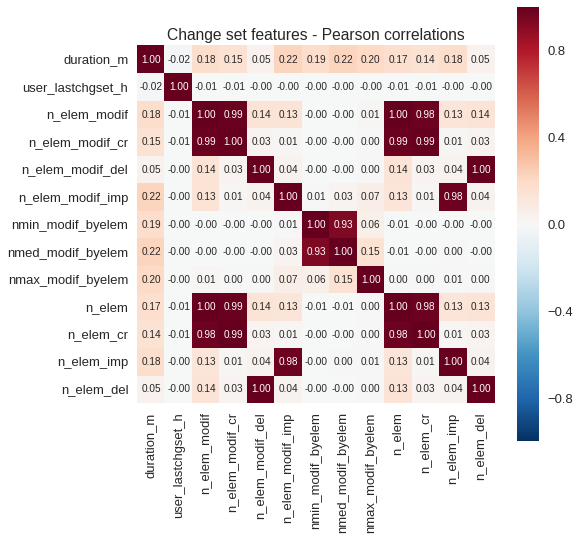

In [17]:
f, ax = plt.subplots(figsize=(8,8))
plt.title('Change set features - Pearson correlations')
# Draw the heatmap using seaborn
sns.heatmap(chgset_md.astype(float).corr(), vmax=1, 
            square=True, annot=True, annot_kws={'size':10}, fmt='.2f')

#### Outlier analysis

Is it useful to filter data in this analysis? Basically we think it is not: outliers are typically users who do not contribute as others. So they deserve to constitute one or more user cluster in themselves.

#### Data normalization

In [18]:
X = chgset_md.values
X_std = StandardScaler().fit_transform(X)

In [19]:
pd.DataFrame(X_std).describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
0,34276.0,-0.0,1.0,-0.170,-0.170,-0.169,-0.167,37.245
1,34276.0,0.0,1.0,-4.029,-0.153,-0.153,-0.146,30.060
2,34276.0,-0.0,1.0,-0.075,-0.075,-0.073,-0.061,37.334
3,34276.0,-0.0,1.0,-0.061,-0.061,-0.061,-0.056,38.000
4,34276.0,0.0,1.0,-0.046,-0.046,-0.046,-0.046,107.750
5,34276.0,0.0,1.0,-0.089,-0.083,-0.076,-0.051,118.967
6,34276.0,0.0,1.0,-0.076,-0.076,-0.076,-0.076,66.608
7,34276.0,0.0,1.0,-0.089,-0.089,-0.089,-0.089,60.935
8,34276.0,-0.0,1.0,-0.029,-0.029,-0.029,-0.029,182.984
9,34276.0,0.0,1.0,-0.073,-0.073,-0.071,-0.059,37.383


### Principle Component Analysis

#### Variance evaluation

In [20]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[  4.05405867e+00   2.14555696e+00   2.00463318e+00   1.90854276e+00
   7.44699813e-01   1.05304434e+00   9.99298608e-01   6.45255460e-02
   1.57141568e-02   1.02088125e-02   5.15266246e-05   4.49049620e-05
  -6.45666693e-16]


In [21]:
eig_vals = sorted(eig_vals, reverse=True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in eig_vals] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [22]:
# Summarize the variance analysis in a dedicated data frame
var_analysis = pd.DataFrame({'eig': eig_vals,
                             'varexp': var_exp,
                             'cumvar': cum_var_exp})[['eig','varexp','cumvar']]
var_analysis.round(2).head(10).T

,0,1,2,3,4,5,6,7,8,9
eig,4.05,2.15,2.00,1.91,1.05,1.00,0.74,0.06,0.02,0.01
varexp,31.18,16.50,15.42,14.68,8.10,7.69,5.73,0.50,0.12,0.08
cumvar,31.18,47.69,63.11,77.79,85.89,93.58,99.30,99.80,99.92,100.00


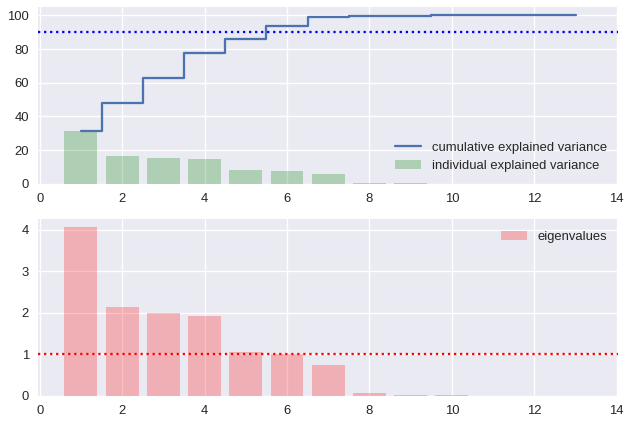

In [23]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 8))
f, ax = plt.subplots(2,1)
ax[0].bar(range(1,1+len(var_analysis)), var_analysis['varexp'].values, alpha=0.25, 
        align='center', label='individual explained variance', color = 'g')
ax[0].step(range(1,1+len(var_analysis)), var_analysis['cumvar'].values, where='mid',
         label='cumulative explained variance')
ax[0].axhline(90, color="blue", linestyle="dotted")
ax[0].legend(loc='best')
ax[1].bar(range(1,1+len(var_analysis)), var_analysis['eig'].values, alpha=0.25,
          align='center', label='eigenvalues', color='r')
ax[1].axhline(1, color="red", linestyle="dotted")
ax[1].legend(loc="best")
plt.show()


According to these figures, the best number of dimensions is between 5 and 7:
- with 5 dimensions, we capture 84.4% of the variance, and every eigenvalues are larger than 1;
- with 6 (resp. 7) dimensions, we capture more than 90% of the variance (resp. 92.0 and 99.3), and eigenvalues are still around 1 (resp. 0.98 and 0.95).

#### Run the PCA

We begin the PCA with 5 dimensions, to keep this analysis as readable as possible.

In [24]:
npc = 5
pca = PCA(n_components=npc)
Xpca = pca.fit_transform(X_std)
pca_cols = ['PC' + str(i+1) for i in range(npc)]

#### Feature contribution

In [25]:
# Record feature contributions to each dimension
feat_contrib = pd.DataFrame(pca.components_, index=pca_cols, 
                        columns=chgset_md.columns).T

                             PC1       PC2       PC3       PC4       PC5
user_lastchgset_inhour  0.010151  0.015031  0.002384  0.013323  0.702276
duration_insec          0.001603  0.018313  0.005063  0.019318  0.701863
n_elem_modif            0.498729 -0.019898  0.010485  0.006369 -0.002834
n_elem_modif_cr         0.490097 -0.129530  0.022435 -0.007246 -0.000444
n_elem_modif_imp        0.071574  0.489858  0.149745  0.477704 -0.019491
n_elem_modif_del        0.083183  0.480748 -0.286066 -0.421193 -0.000828
nmin_modif_byelem      -0.004203  0.102871  0.616812 -0.302430 -0.018215
nmed_modif_byelem      -0.003300  0.113295  0.626386 -0.296462 -0.004780
nmax_modif_byelem       0.003600  0.060384  0.148720 -0.032524  0.110026
n_elem                  0.498686 -0.022916  0.007965  0.005358 -0.004938
n_elem_cr               0.488143 -0.131267  0.023281 -0.006237 -0.001108
n_elem_imp              0.070692  0.485107  0.133012  0.485599 -0.036341
n_elem_del              0.083163  0.480661 -0.28612

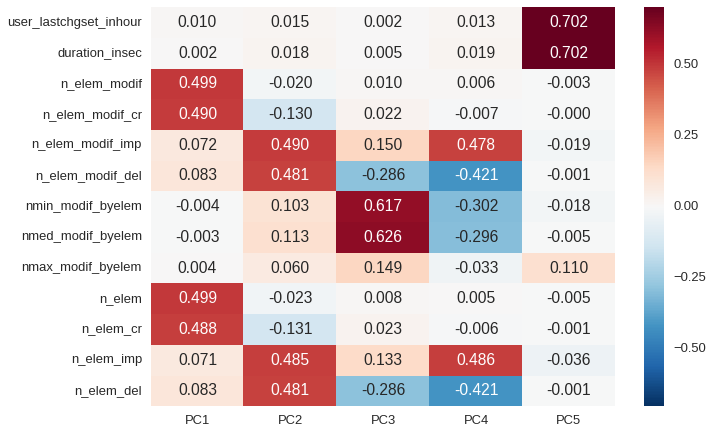

In [22]:
print(feat_contrib)
sns.heatmap(feat_contrib, annot=True, fmt='.3f')

The first dimension is highly impacted by the element creations. By the way we have to notice again that creation events and modifications in a larger sense are highly linked (this can be highlighted by the correlation matrix above).

The second dimension is related to element improvement and deletion events. Creation events are negatively linked with this second component.

Then the first dimension receives strong contributions from the modification counters for unique elements. Consequently change sets in which unique elements receive a lot of modifications will be identified through this component.

Furthermore a change set with a high value for the fourth dimension is a change set where improvement events are numerous and where there are just a few deletion events as well as a few modifications for most unique elements.

Last the fifth dimension is related to chronological features. This component will be higher if the change set has a large duration and if the user last change set is old. However both features are not correlated, making the interpretation as cautious as possible.

#### Distribution of individuals into the PCA

In [26]:
# Record PCA scores into a data frame
pca_scores = pd.DataFrame(Xpca, columns=pca_cols, index=chgset_md.index.get_level_values('chgset'))
pca_scores.head()

,PC1,PC2,PC3,PC4,PC5
chgset,,,,,
3649,-0.136609,0.767426,-0.857886,-0.673565,-0.123997
4562,0.728871,1.561484,0.135588,1.064934,0.895770
4883,3.466331,5.489328,0.253886,-0.030881,6.380450
4890,0.402341,1.255798,-0.189375,0.363889,1.636007
5162,0.079331,0.428453,-0.118549,0.121744,0.732906


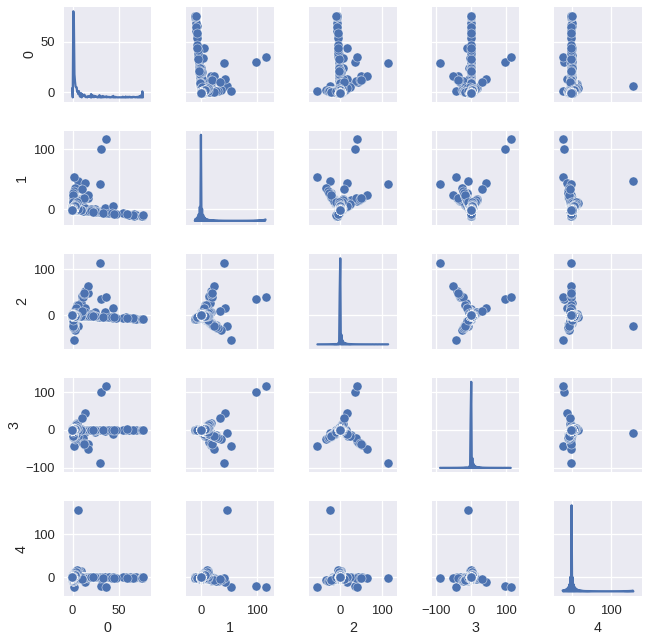

In [27]:
sns.pairplot(pd.DataFrame(Xpca), palette= 'Dark2',
             diag_kind='kde',size=1.85)

In [28]:
pd.DataFrame(Xpca).describe().T

,count,mean,std,min,25%,50%,75%,max
0,34276.0,1.054492e-15,2.013469,-0.336650,-0.172124,-0.166460,-0.130847,75.335808
1,34276.0,-4.713241e-16,1.464772,-11.351759,-0.193571,-0.189257,-0.144988,116.197215
2,34276.0,1.658605e-17,1.415851,-53.444128,0.024939,0.026121,0.038160,113.995884
3,34276.0,1.184746e-16,1.381500,-88.915067,0.016794,0.020008,0.040611,114.385770
4,34276.0,-3.701251e-16,1.026179,-22.613682,-0.035231,-0.023426,-0.021839,156.160327


Some typical individuals (*i.e.* change sets) can be highlighted:

In [29]:
# Change sets with a lot of creation events (Dimension 1)
pca_scores = pca_scores.sort_values('PC1', ascending=False)
chgset_index = pca_scores.head().index
chgset_md.iloc[chgset_md.index.get_level_values('chgset')
               .isin(chgset_index)].T

chgset,10924070,10953266,11588470,15852662,16656329
uid,219843,219843,260584,706229,1398891
duration_m,103.366667,91.733333,100.483333,88.383333,182.916667
user_lastchgset_h,0.443333,35.034167,1.406944,74.414444,616.118889
n_elem_modif,49982.000000,50000.000000,50000.000000,50000.000000,50000.000000
n_elem_modif_cr,49982.000000,50000.000000,50000.000000,50000.000000,50000.000000
n_elem_modif_del,0.000000,0.000000,0.000000,0.000000,0.000000
n_elem_modif_imp,0.000000,0.000000,0.000000,0.000000,0.000000
nmin_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000
nmed_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000
nmax_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Change sets with a lot of improvement and deletion events (Dimension 2)
pca_scores = pca_scores.sort_values('PC2', ascending=False)
chgset_index = pca_scores.head().index
chgset_md.iloc[chgset_md.index.get_level_values('chgset')
               .isin(chgset_index)].T

chgset,9205201,9205951,11049604,11896748,11896304
uid,201149,201149,219843,260584,260584
user_lastchgset_inhour,0.0,0.0,0.0,0.0,0.0
duration_insec,0.0,0.0,0.0,0.0,0.0
n_elem_modif,16409.0,18880.0,6701.0,14773.0,8371.0
n_elem_modif_cr,0.0,0.0,0.0,0.0,0.0
n_elem_modif_imp,16409.0,18880.0,0.0,0.0,1.0
n_elem_modif_del,0.0,0.0,6701.0,14773.0,8370.0
nmin_modif_byelem,1.0,1.0,1.0,1.0,1.0
nmed_modif_byelem,1.0,1.0,1.0,1.0,1.0
nmax_modif_byelem,1.0,1.0,1.0,1.0,1.0


In [31]:
# Change sets with a lot of modification per unique elements (Dimension 3)
pca_scores = pca_scores.sort_values('PC3', ascending=False)
chgset_index = pca_scores.head().index
chgset_md.iloc[chgset_md.index.get_level_values('chgset')
               .isin(chgset_index)].T

chgset,11049604,11289841,11896304,11896748,15659304
uid,219843,541803,260584,260584,662440
duration_m,11.350000,33.066667,9.000000,16.516667,4.783333
user_lastchgset_h,0.596111,11.513611,557.060833,1.012500,0.581667
n_elem_modif,6701.000000,9115.000000,8371.000000,14773.000000,6565.000000
n_elem_modif_cr,0.000000,2594.000000,0.000000,0.000000,2.000000
n_elem_modif_del,6701.000000,6300.000000,8370.000000,14773.000000,6329.000000
n_elem_modif_imp,0.000000,221.000000,1.000000,0.000000,234.000000
nmin_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000
nmed_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000
nmax_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Change sets with a lot of improvements but just a few deletions (Dimension 4)
pca_scores = pca_scores.sort_values('PC4', ascending=False)
chgset_index = pca_scores.head().index
chgset_md.iloc[chgset_md.index.get_level_values('chgset')
               .isin(chgset_index)].T

chgset,45649120,9204502,9205201,9205951,13648521
uid,107257,201149,201149,201149,870861
user_lastchgset_inhour,0.0,0.0,0.0,0.0,5099.0
duration_insec,0.0,0.0,0.0,0.0,0.0
n_elem_modif,5139.0,7352.0,16409.0,18880.0,2964.0
n_elem_modif_cr,0.0,0.0,0.0,0.0,2.0
n_elem_modif_imp,5139.0,7352.0,16409.0,18880.0,2920.0
n_elem_modif_del,0.0,0.0,0.0,0.0,42.0
nmin_modif_byelem,1.0,1.0,1.0,1.0,1.0
nmed_modif_byelem,1.0,1.0,1.0,1.0,1.0
nmax_modif_byelem,1.0,1.0,1.0,1.0,1.0


In [30]:
# Change sets with long change set duration (Dimension 5)
pca_scores = pca_scores.sort_values('PC5', ascending=False)
chgset_index = pca_scores.head().index
chgset_md.iloc[chgset_md.index.get_level_values('chgset')
               .isin(chgset_index)].T

chgset,192028,529013,581278,628135,11133201
uid,32621,39085,53048,54026,70696
duration_m,426.566667,465.133333,597.616667,519.683333,690.316667
user_lastchgset_h,0.000000,-1272.997778,-2277.598611,1.666111,60.927222
n_elem_modif,1364.000000,600.000000,3726.000000,3024.000000,3.000000
n_elem_modif_cr,1.000000,280.000000,2655.000000,1767.000000,0.000000
n_elem_modif_del,0.000000,24.000000,638.000000,566.000000,0.000000
n_elem_modif_imp,1363.000000,296.000000,433.000000,691.000000,3.000000
nmin_modif_byelem,1.000000,1.000000,1.000000,1.000000,1.000000
nmed_modif_byelem,8.000000,1.000000,1.000000,1.000000,1.000000
nmax_modif_byelem,1355.000000,14.000000,8.000000,15.000000,1.000000


### Clustering process

#### Investigations about the clustering number

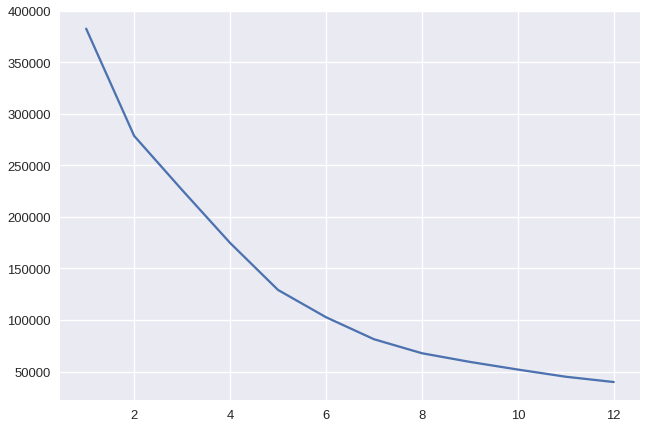

In [32]:
# Basic method: clustering inertia (i.e. intracluster variance)
scores = []
xaxis = [1+i for i in range(12)]
for i in xaxis:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xpca)
    scores.append(kmeans.inertia_)
plt.plot(xaxis, scores)

Some elbow appear successively at *k=2*, *k=5* and *k=7*. The most important one seems to be at *k=5*...

Similarly, we can compute the within-cluster sum of square (*i.e.* intracluster variance) and the between-cluster sum of square (*i.e.* intercluster variance)

In [33]:
# Compute total variance in the sample and discriminate explained variance
# source 1: https://fr.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
# source2: https://gist.github.com/calippo/20a147e657ee5e8d8666
from scipy.spatial.distance import cdist, pdist
# Total variance
tss = sum(pdist(Xpca)**2)/Xpca.shape[0]
# Explained variance (i.e. by the clustering model)
k_range = range(1,13)
k_means_var = [KMeans(n_clusters=k).fit(Xpca) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]
k_euclid = [cdist(Xpca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]
wss = [sum(d**2) for d in dist]
# Unexplained variance
bss = tss - wss

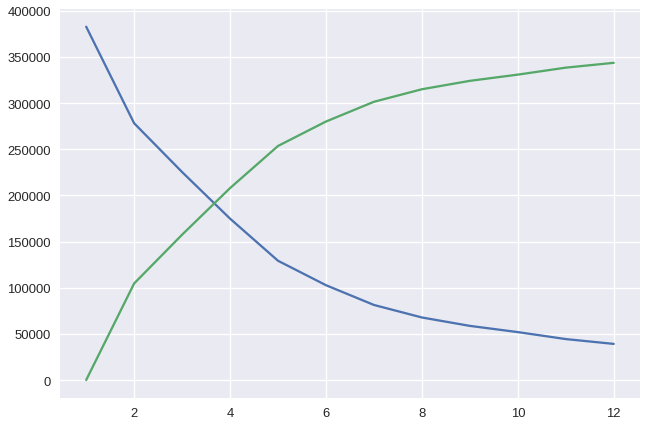

In [34]:
plt.plot(k_range, wss)
plt.plot(k_range, bss)

From that, the total explained variance comes easily:

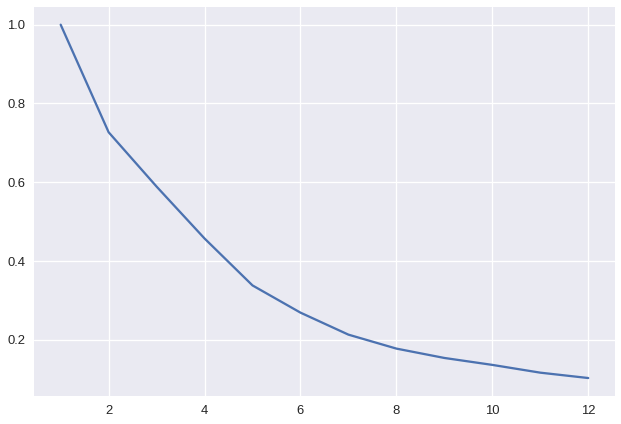

In [35]:
plt.plot(k_range, wss/tss)

As a remark, the list `wss` design the same thing that `scores`, previously defined. By the way, both are not computed exactly in the same manner, the following figure allowing to show that point.

[382709.02607214876, 278698.94593602553, 226178.26413731216, 174822.44924428588, 129177.35072319259, 102717.96274967867, 81355.365202968911, 67751.850360497992, 59345.725329839137, 51910.561104953755, 44940.991454751937, 39797.95080780756]
[382709.026072159, 278118.11597335408, 225282.32926803344, 174810.83593105071, 129177.35072319732, 102717.96274967771, 81322.907336341261, 67749.714988349268, 58652.846899151693, 51909.91811811558, 44353.678890284013, 39133.717752315606]


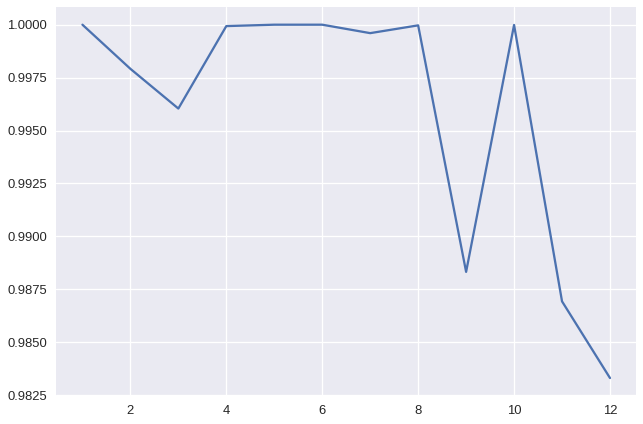

In [36]:
print(scores)
print(wss)
plt.plot(k_range, [i/j for i,j in zip(wss,scores)])

In [37]:
# source (adapted from): 
# https://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape
    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(cdist(X[np.where(labels == i)], 
                                                  [centers[0][i]], 
             'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
    return(BIC)

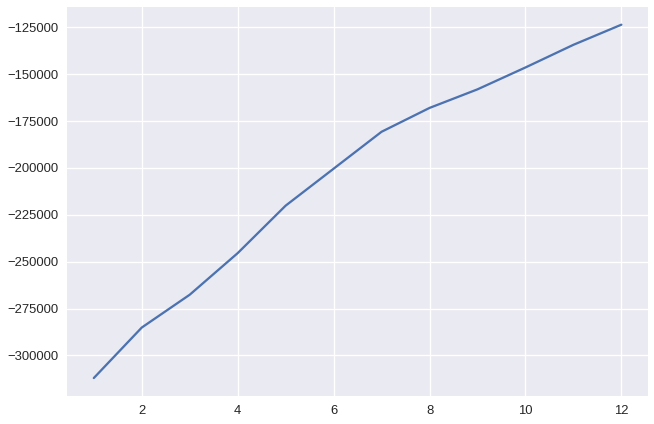

In [38]:
xaxis = range(1,13)
scores = []
for i in xaxis:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xpca)
    scores.append(compute_bic(kmeans, Xpca))
plt.plot(xaxis, scores)

This new criterion intends to limit the advantage of putting a high number of clusters in the analysis. This quantity appears as a penalty in the objective function.

** For the moment, this criterion is not valid here. Do not consider the previous figure.**

Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12


{'boxes': [<matplotlib.lines.Line2D at 0x7f70bb2b7e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f70bb2c9908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f70bb2d1be0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f70bb2d1390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f70bb2c2828>,
  <matplotlib.lines.Line2D at 0x7f70bb1bec18>]}

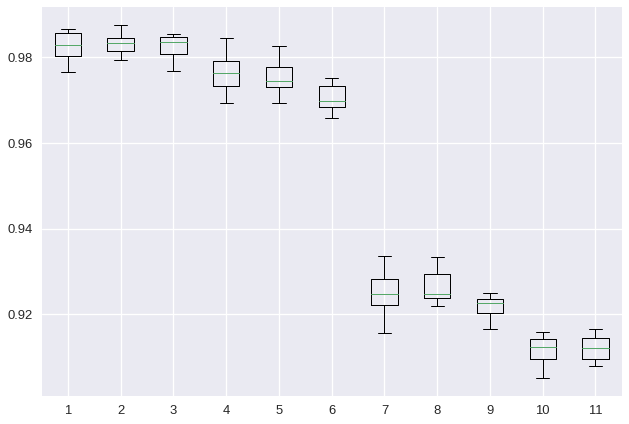

In [41]:
# Silhouette
# reference paper: Kaufman, Rousseeuw (1990)
from sklearn.metrics import silhouette_score

# input: Xpca
scores = []
xaxis = [1+i for i in range(12)][1:]
for i in xaxis:
    print("Iteration {0}".format(i))
    kmeans = KMeans(n_clusters=i)
    Xclust = kmeans.fit_predict(Xpca)
    silhouette_avg = []
    for k in range(10):
        silhouette_avg.append(silhouette_score(X=Xpca, labels=Xclust, sample_size=5000))
    scores.append(silhouette_avg)
plt.boxplot(scores)

That is a fairly important criterion in the decision process ! The clustering silhouette shows very strong performances for cluster quantity between 2 and 4, then it decreases slightly with 5 clusters, and falls with more clusters.

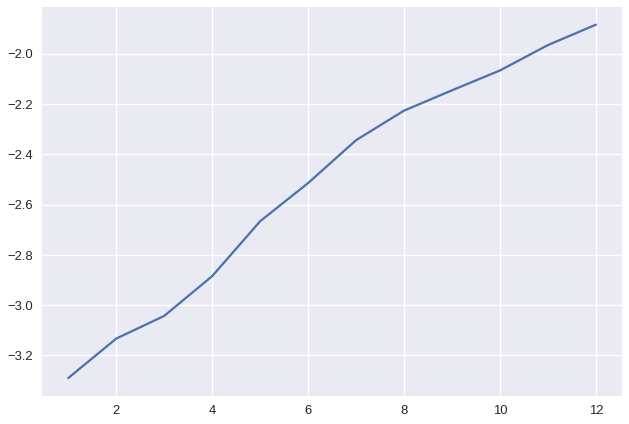

In [42]:
# Gap statistic
# reference paper: Tibshirani, Walther, Hastie (2001)
scores = []
xaxis = [1+i for i in range(12)]
for i in xaxis:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xpca)
    refdist = []
    for k in range(5):
        Xsample = np.random.random_sample(size=Xpca.shape)
        kmref = KMeans(n_clusters=i)
        kmref.fit(Xsample)
        refdist.append(kmref.inertia_)
    scores.append(np.log(np.mean(refdist)) - np.log(kmeans.inertia_))
plt.plot(xaxis, scores)

This criterion has to be maximized. The previous results do not seem very interesting in this matter. However this method has a major drawback, namely its dependency to a sampling step. As the number of replications is small, this may impact the method performance.

However we can observe the same elbow phenomenon for *k=2, 5 and 7* (this is quite uncautious to consider it as a real proof, however it comes with other elements to make clearer the body of evidence).


In [43]:
# Gap statistic
# reference paper: Tibshirani, Walther, Hastie (2001)
# inspired from https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/
def Wk(mu, clusters):
    wk_components = []
    for k in range(len(mu)):
        c = np.where(clusters==k)[0]
        wk_components.append(1/(2*len(c))*sum([np.linalg.norm(mu[k]-ind)**2 for ind in c]))
    return sum(wk_components)

def box_range(X):
    #box = []
    #for col in X:
     #   box.append((np.min(col),np.max(col)))
    #return box
    return [np.max(feature)-np.min(feature) for feature in X.T]

def gap_statistic(X):
    # Dispersion for real distribution
    ks = range(1,13)
    Wks = np.zeros(len(ks))
    Wkbs = np.zeros(len(ks))
    sk = np.zeros(len(ks))
    for indk, k in enumerate(ks):
        print("*** k = {0} ***".format(k))
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(Xpca)
        Xclust = kmeans.predict(Xpca)
        centroids = kmeans.cluster_centers_
        Wks[indk] = np.log(Wk(centroids, Xclust))
        # Create B reference datasets
        B = 10
        BWkbs = np.zeros(B)
        for i in range(B):
            sampl = np.random.uniform(low=0.5, high=13.3, size=(50,))
            Xb = np.random.random_sample(size=Xpca.shape)*box_range(Xpca)
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(Xb)
            Xclust = kmeans.predict(Xb)
            centroids = kmeans.cluster_centers_
            BWkbs[i] = np.log(Wk(centroids, Xclust))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*np.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

In [44]:
(x_axis, Wks, Wkbs, gapstat) = gap_statistic(Xpca)

*** k = 1 ***
*** k = 2 ***
*** k = 3 ***
*** k = 4 ***
*** k = 5 ***
*** k = 6 ***
*** k = 7 ***
*** k = 8 ***
*** k = 9 ***
*** k = 10 ***
*** k = 11 ***
*** k = 12 ***


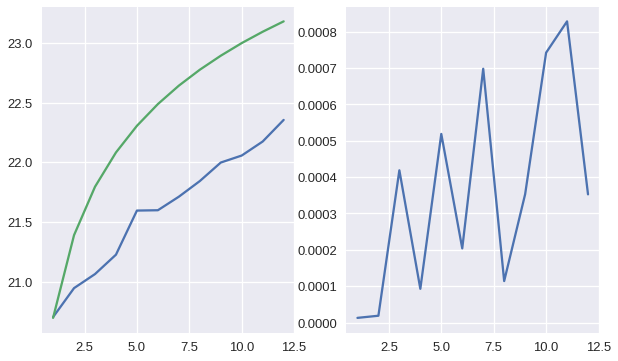

In [45]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.plot(x_axis, Wks)
ax1.plot(x_axis, Wkbs)
ax2.plot(x_axis, gapstat)

According to the last plot, 3 clusters could be the best choice. We can notice that there are peaks at 5 and 9 clusters too.

*Note: W curves are decreasing on each state-of-the-art examples, there seem to be a mistake here...*

Conclusion:
- elbow method with within-cluster variance analysis --> OK
- BIC --> KO
- silhouette method --> OK (through sampling)
- gap statistic --> KO

#### K-means clustering

For the following steps of the study, we choose `k=5` (clearest elbow, good silhouette performance).

In [50]:
kmeans = KMeans(n_clusters=5)
Xclust = kmeans.fit_predict(Xpca)
pd.Series(Xclust).value_counts()

0    34134
3       83
1       47
4       10
2        2
dtype: int64

In [47]:
# Define our own color map
LABEL_COLOR_MAP = {0:'r', 1:'g', 2:'b', 3:"yellow", 4:"black"}
label_color = [LABEL_COLOR_MAP[l] for l in Xclust]

In [51]:
# Create a temp dataframe from our PCA projection data "Xpca"
chgset_clust = pca_scores.copy()
chgset_clust['X_cluster'] = Xclust

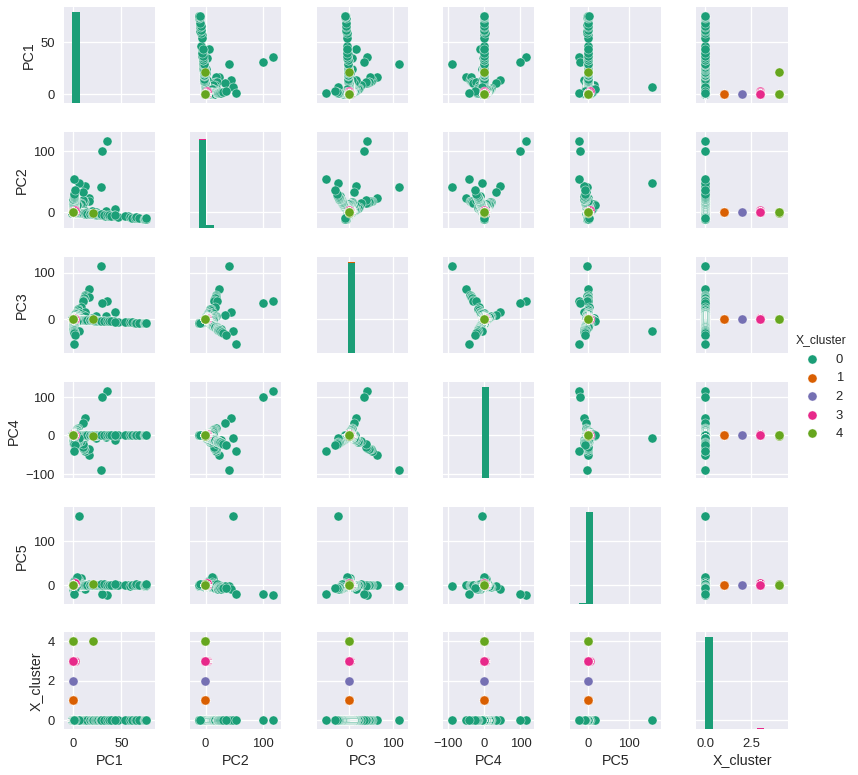

In [52]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(chgset_clust, hue='X_cluster', palette= 'Dark2', size=1.85)